# Final Project: Regression Analysis - Medical Costs
**Author:** Eric Meyer

**Date:** 04/17/2025  

**Introduction:** In this project, we analyze a medical insurance dataset to predict individual medical costs billed by health insurance based on personal attributes. This regression task will help uncover the impact of age, BMI, smoking status, and other features on insurance charges.


## Section 1: Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

df = pd.read_csv('insurance.csv')
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 1.2 Check for missing values and display summary statistics

In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

### Reflection 1

- The dataset contains 1,338 records and 7 columns, each with complete data (no missing values).

- There are 3 categorical features:
  - sex
  - smoker
  - region

- And 4 numerical features:
  - age
  - bmi
  - children
  - charges (target variable)

- **Key Observations:**
  - Age ranges from 18 to 64, with a mean of ~39 years.
  - BMI values are mostly between 26 and 35, though some go as high as 53.
  - Charges are highly variable, ranging from just over $1,000 to more than $63,000, suggesting the presence of outliers or skew due to factors like smoking or chronic illness.

## Section 2: Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

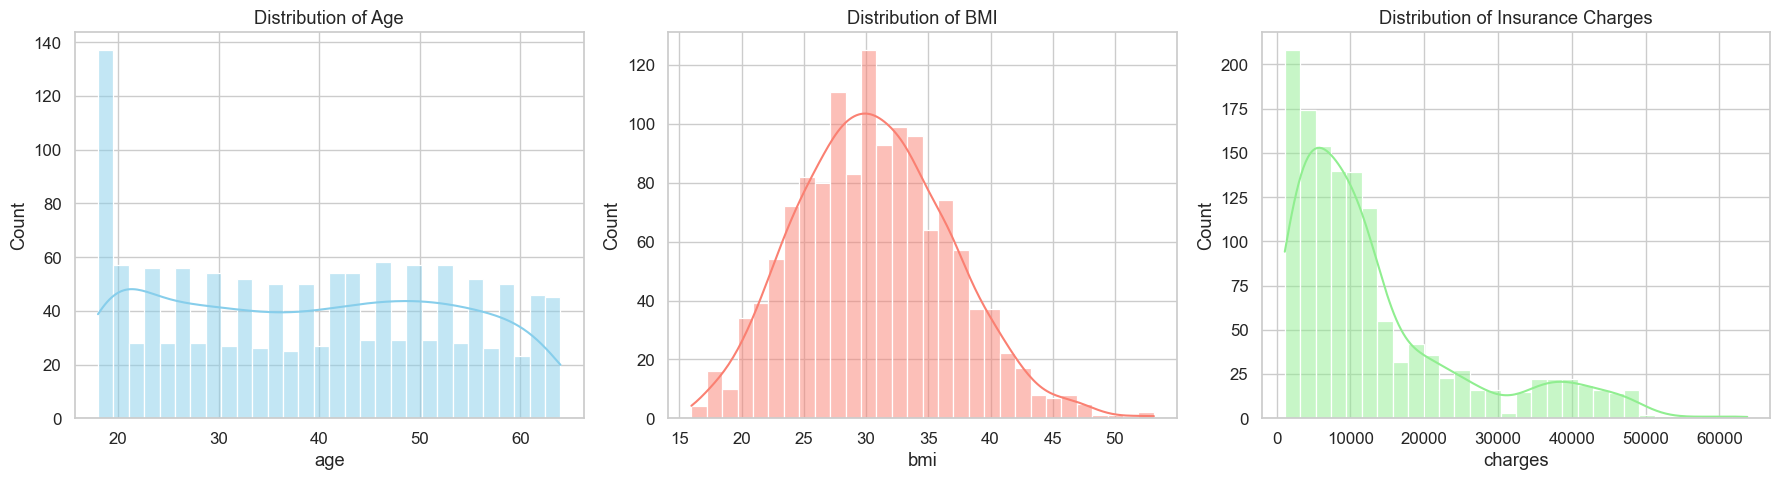

In [5]:
# Set plot aesthetics
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

# 1. Distribution of numerical variables using KDE Histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Age')

sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of BMI')

sns.histplot(df['charges'], bins=30, kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of Insurance Charges')

plt.tight_layout()
plt.show()

C:\Users\Lexi\AppData\Local\Temp\ipykernel_24712\3895395179.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='age', x='smoker', data=df, ax=axes[0], palette='pastel')
C:\Users\Lexi\AppData\Local\Temp\ipykernel_24712\3895395179.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='bmi', x='sex', data=df, ax=axes[1], palette='Set2')
C:\Users\Lexi\AppData\Local\Temp\ipykernel_24712\3895395179.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='charges', x='children', data=df, ax=axes[2], palette='coolwarm')


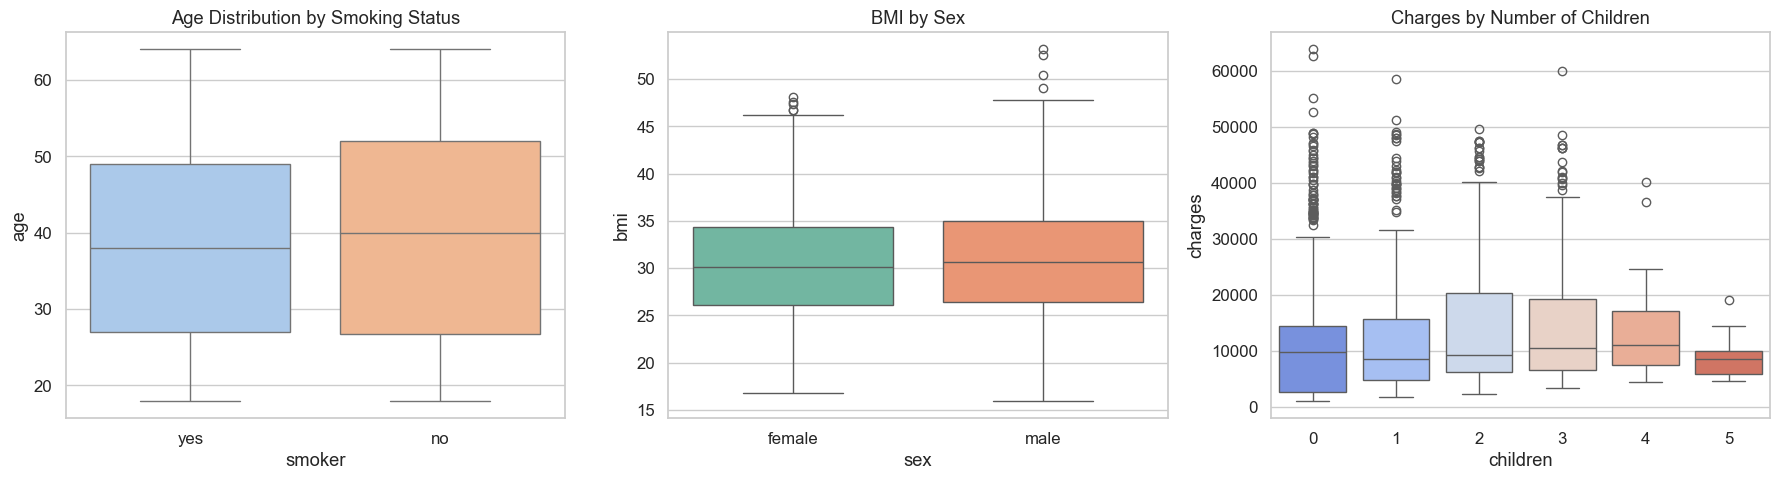

In [6]:
# 2. Boxplots with hue (adds categorical insight)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y='age', x='smoker', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Age Distribution by Smoking Status')

sns.boxplot(y='bmi', x='sex', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('BMI by Sex')

sns.boxplot(y='charges', x='children', data=df, ax=axes[2], palette='coolwarm')
axes[2].set_title('Charges by Number of Children')

plt.tight_layout()
plt.show()

C:\Users\Lexi\AppData\Local\Temp\ipykernel_24712\2249627775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=df, ax=axes[2], palette='muted')


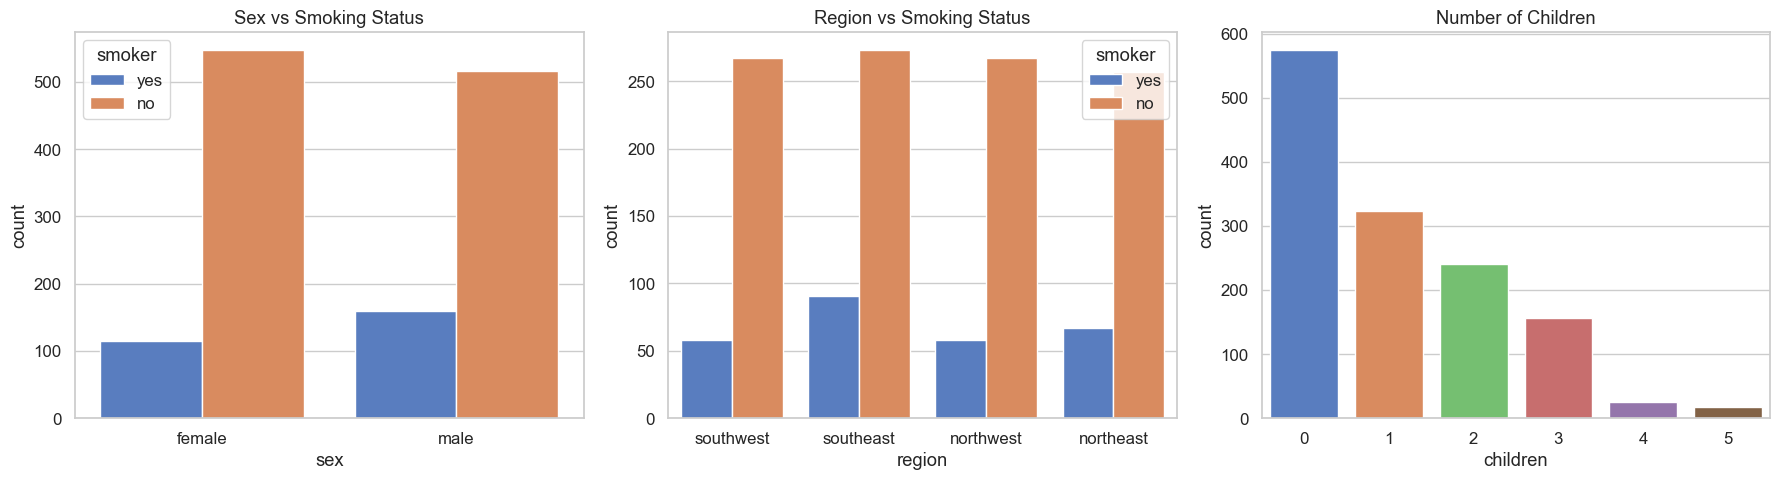

In [7]:
# 3. Count Plots with Hue
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='sex', hue='smoker', data=df, ax=axes[0])
axes[0].set_title('Sex vs Smoking Status')

sns.countplot(x='region', hue='smoker', data=df, ax=axes[1])
axes[1].set_title('Region vs Smoking Status')

sns.countplot(x='children', data=df, ax=axes[2], palette='muted')
axes[2].set_title('Number of Children')

plt.tight_layout()
plt.show()

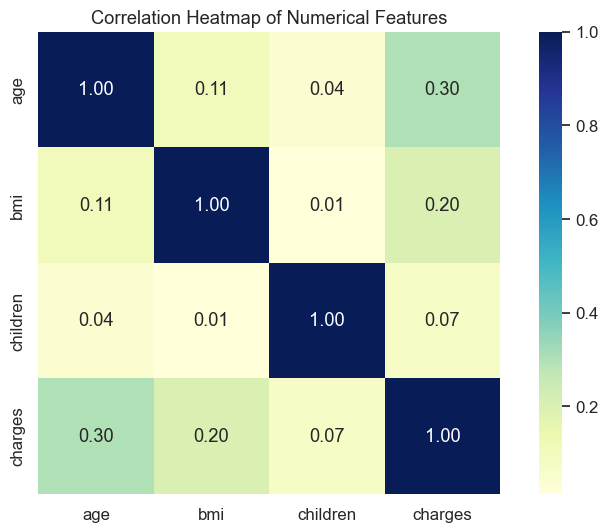

In [8]:
# 4. Heatmap of correlations
plt.figure(figsize=(10, 6))
corr = df[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

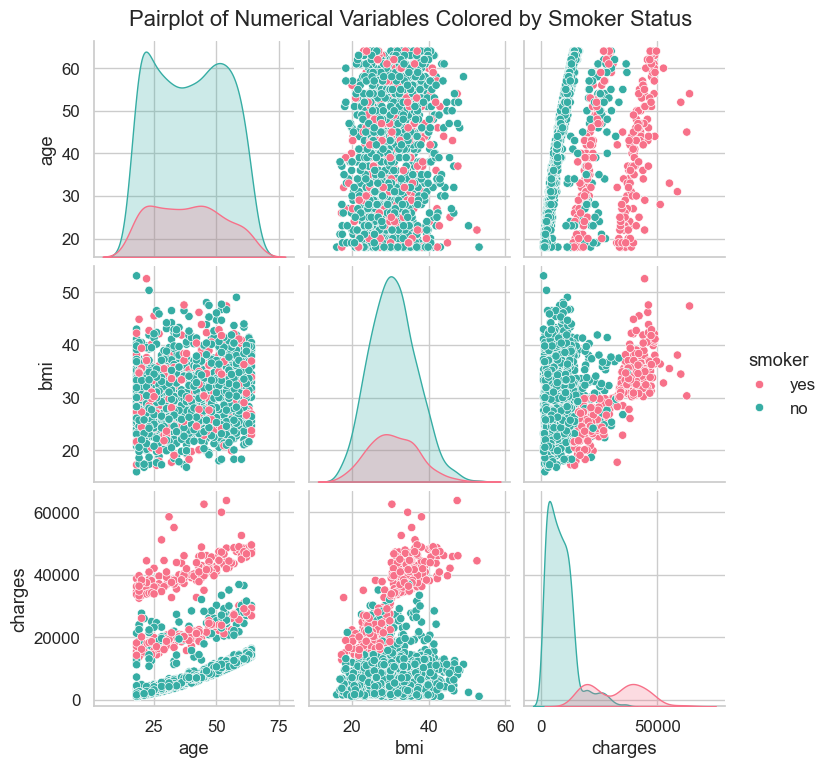

In [9]:
# 5. Pairplot to visualize relationships
sns.pairplot(df, hue='smoker', vars=['age', 'bmi', 'charges'], palette='husl')
plt.suptitle('Pairplot of Numerical Variables Colored by Smoker Status', y=1.02)
plt.show()

### 2.2 Handle Missing Values and Clean Data

#### No missing values

In [10]:
# Encoding categorical data
df_encoded = pd.get_dummies(df, drop_first=True)

### 2.3 Feature Selection and Engineering

In [11]:
scaler = StandardScaler()
scaled_columns = ['age', 'bmi', 'children']
df_encoded[scaled_columns] = scaler.fit_transform(df_encoded[scaled_columns])

### Reflection 2:

**What patterns or anomalies do you see?**
- Smoker clearly have higher charges when looking at the data
- Also high BMI and smoking definitely increases insurance charges
- Most smokers are under the age of 30
- Age has the highest correlation with charges
- BMI is ver evenly distributed and peaks around 30
- While charges is mostly packed to the left of the chart and under $10,000


## Section 3: Feature Selection and Justification

### 3.1 Choose Features and Target

**Selected Features:**
- age
- bmi
- children
- smoker_yes
- sex_male

**Target:** 
- charges

**Reasoning:**
- Age, BMI, and smoking status are known risk factors in health costs.

### 3.2 Define X and Y

In [12]:
X = df_encoded[['age', 'bmi', 'children', 'smoker_yes', 'sex_male']]
y = df_encoded['charges']

### Reflection 3:

- Smoking status was expected to have a strong effect, and so it was essential to include.
- Age and BMI also showed clear upward trends.

## Section 4: Train a Model - Linear Regression

### 4.1 Split the Data

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.2 Create and Train Model

In [16]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### 4.3 Evaluate Model Performance

In [19]:
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}')

R2: 0.7811, MAE: 4213.48, RMSE: 5829.17


### Relection 4:

**How well did the model perform?**
1. The linear regression model performed fairly well, achieving an R² score of 0.7811, which indicates that about 78% of the variance in medical charges was explained by the features in the model. This is a solid performance for a regression task involving real-world data.

2. The Mean Absolute Error (MAE) of $4,213.48 and Root Mean Squared Error (RMSE) of $5,829.17 suggest that, on average, the model's predictions were off by a few thousand dollars. This level of error is not insignificant but is somewhat expected given the wide range of possible charges in the dataset.

**Any surprises in the results?**
1. One surprise in the results was how well the model performed using relatively simple features like age, BMI, number of children, smoking status, and region. In particular, smoking status stood out as a highly influential feature—likely due to its strong correlation with higher medical costs. Other categorical features such as region had less impact, suggesting that geography might not play as large a role in cost variation as expected.

## Section 5: Improve the Model or Try Alternates (Pipelines)

### 5.1 Pipeline 1: Imputer → StandardScaler → Linear Regression

In [22]:
pipe1 = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
pipe1.fit(X_train, y_train)
pred1 = pipe1.predict(X_test)

print(f'Pipeline 1 RMSE: {np.sqrt(mean_squared_error(y_test, pred1)):.2f}')

Pipeline 1 RMSE: 5829.17


### 5.2 Pipeline 2: Polynomial Features

In [25]:
pipe2 = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
pipe2.fit(X_train, y_train)
pred2 = pipe2.predict(X_test)

print(f'Pipeline 2 RMSE: {np.sqrt(mean_squared_error(y_test, pred2)):.2f}')

Pipeline 2 RMSE: 4594.98


### 5.2 Compare Model Performance

In [26]:
r2_pipe1 = r2_score(y_test, pred1)
r2_pipe2 = r2_score(y_test, pred2)

print(f'Linear R2: {r2:.4f}, Pipeline1 R2: {r2_pipe1:.4f}, Poly Pipeline R2: {r2_pipe2:.4f}')

Linear R2: 0.7811, Pipeline1 R2: 0.7811, Poly Pipeline R2: 0.8640


### Reflection 5:

**Which models performed better? How does scaling impact results?**
- Among the three models tested, the Polynomial Pipeline (degree=3) performed the best, achieving an R² score of 0.8640. This represents a significant improvement over both the standard Linear Regression model and Pipeline 1, which each had an R² of 0.7811.

- The performance boost from the polynomial pipeline suggests that the relationship between features and medical charges is nonlinear—especially in how variables like age, BMI, and smoking status interact. By expanding the feature space with higher-degree terms, the model captured more complex patterns in the data, leading to better predictions.

- In terms of scaling, both pipelines used StandardScaler, which helps ensure that features contribute equally to the model (especially important for polynomial transformations). While scaling didn’t improve the Linear model’s R², it was crucial in Poly Pipeline to prevent certain polynomial terms from dominating due to their larger magnitude. Without scaling, the polynomial model might have been unstable or overfit.

- **Key takeaway:** Scaling ensures stability and fair treatment of features, while the polynomial expansion captured the underlying complexity in the data that a linear model couldn't.

## Section 6: Final Thoughts and Insights

### 6.1 Summarize Findings

The Banknote Authentication dataset was successfully classified using Decision Tree and Random Forest models. The Decision Tree model performed well, achieving a good accuracy, but the Random Forest model showed slightly better performance, with an accuracy of 99.6%, compared to Decision Tree's 99.2%.

Random Forest showed superior results due to its ensemble nature, reducing overfitting and improving stability.

Data standardization played an essential role in enhancing model performance, particularly for Random Forest, by normalizing feature distributions and improving generalization.

### 6.2 Discuss Challenges Faces

Hyperparameter tuning was a challenge, especially in finding the right balance to avoid overfitting with Decision Tree. This was mitigated somewhat by Random Forest's ensemble nature, which helped to prevent overfitting to individual patterns in the data.

The dataset contained outliers (as seen in boxplots), which may have been important for detecting fraudulent transactions (or "fake" banknotes). These outliers could have influenced the models’ ability to distinguish between normal and fraudulent instances, particularly in the Random Forest model.

### 6.3 If You Had More Time, What Would You Try Next?

Testing other models like Logistic Regression and SVM to compare their performance and see if they could provide additional insight or accuracy gains.

I also would want to try prediction on another dataset in a different industry.